In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('liga1_mw9.csv',
                sep=';')
df = df.drop(['fail_pass','succes_pass(%)','ball_pos'],axis=1).sort_values(by='pts',ascending=False)
df = df.rename(columns={'matchweek 9':'team'})
df['shots_per_90'] = round(df['total_shots']/9,1)
df['passes_per_90'] = round(df['attempt_pass']/9,1)
df['conversion_rate'] = 100*round(df['gf']/df['shots_on'],3)
df['shots_per_pass_seq'] = round(df['succes_pass']/df['total_shots'],2) #menghitung berapa banyak rata-rata passing yang diperlukan untuk bisa melakukan shot, juga sebagai indikator seberapa direct sebuah tim bermain.
df['shots_acc'] = round(df['shots_on']/df['total_shots'],3)*100
df['pass_acc'] = round(df['succes_pass']/df['attempt_pass']*100,2)

df.to_csv('stats_mw_9.csv')

In [77]:
df.head()


,team,succes_pass,attempt_pass,succes_tackle,blocked_shots,shots_on,total_shots,gf,ga,gd,w,d,l,pts,shots_per_90,passes_per_90,conversion_rate,shots_per_pass_seq,shots_acc,pass_acc
5,madura united,2859,3481,150,16,56,72,18,12,6,6,1,2,19,8.0,386.8,32.1,39.71,77.8,82.13
13,ps barito,2396,3092,160,28,47,75,17,8,9,5,2,2,17,8.3,343.6,36.2,31.95,62.7,77.49
17,rans nusantara,2166,2926,175,25,37,62,11,7,4,4,4,1,16,6.9,325.1,29.7,34.94,59.7,74.03
3,borneo,2485,3219,155,22,47,69,14,9,5,4,4,1,16,7.7,357.7,29.8,36.01,68.1,77.20
16,pss,2177,2857,152,18,38,56,16,15,1,4,3,2,15,6.2,317.4,42.1,38.88,67.9,76.20


In [100]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
theta = ['succes_pass','attempt_pass','shots_on','gf','ga','shots_per_90','passes_per_90','shots_per_pass_seq','conversion_rate','shots_acc','pass_acc']
r_avg = []
for a in theta:
    r_avg.append(round(round(df[a].mean(),2)/float(df[a].sum()),3)*10)
#Madura United performance radar
madura_u = df[df['team']=='madura united'].drop(['team','blocked_shots','gd','w','d','l','pts','total_shots','succes_tackle'], axis=1)
r_madura = []
for x in theta:
    r_madura.append(round(float(madura_u[x].values)/float(df[x].sum()),3)*10)
Liga = go.Scatterpolar(
   r = r_avg, theta = theta, mode = 'lines', name = 'Rata-rata Liga',fill='toself',
)
Madura_United = go.Scatterpolar(
   r = r_madura, theta = theta, mode = 'lines', name = 'Madura United', fill='toself')

data = [Liga,Madura_United]
fig = go.Figure(data = data)
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, .8])))
iplot(fig)



In [97]:
rans = df[df['team']=='rans nusantara'].drop(['team','blocked_shots','gd','w','d','l','pts','total_shots','succes_tackle'], axis=1)
r_rans = []
for x in theta:
    r_rans.append(round(float(rans[x].values)/float(df[x].sum()),3)*10)
Liga = go.Scatterpolar(
   r = r_avg, theta = theta, mode = 'lines', name = 'Rata-rata Liga',fill='toself',
)
Rans_Nusantara = go.Scatterpolar(
   r = r_rans, theta = theta, mode = 'lines', name = 'Rans Nusantara', fill='toself',)

data2 = [Liga,Rans_Nusantara]
fig2 = go.Figure(data = data2)
fig2.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, .75])))
iplot(fig2)

In [101]:
barito = df[df['team']=='ps barito'].drop(['team','blocked_shots','gd','w','d','l','pts','total_shots','succes_tackle'], axis=1)
r_barito = []
for x in theta:
    r_barito.append(round(float(barito[x].values)/float(df[x].sum()),3)*10)
Liga = go.Scatterpolar(
   r = r_avg, theta = theta, mode = 'lines', name = 'Rata-rata Liga',fill='toself'
)
PS_Barito = go.Scatterpolar(
   r = r_barito, theta = theta, mode = 'lines', name = 'PS Barito ', fill='toself')

data1 = [Liga,PS_Barito ]
fig1 = go.Figure(data = data1)
fig1.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, .8])))
iplot(fig1)

In [104]:
borneo = df[df['team']=='borneo'].drop(['team','blocked_shots','gd','w','d','l','pts','total_shots','succes_tackle'], axis=1)
r_borneo = []
for x in theta:
    r_borneo.append(round(float(borneo[x].values)/float(df[x].sum()),3)*10)
Liga = go.Scatterpolar(
   r = r_avg, theta = theta, mode = 'lines', name = 'Rata-rata Liga',fill='toself',
)
Borneo = go.Scatterpolar(
   r = r_borneo, theta = theta, mode = 'lines', name = 'Borneo', fill='toself',)

data3 = [Liga,Borneo]
fig3 = go.Figure(data = data3)
fig3.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, .75])))
iplot(fig3)

In [107]:
pss = df[df['team']=='pss'].drop(['team','blocked_shots','gd','w','d','l','pts','total_shots','succes_tackle'], axis=1)
r_pss = []
for x in theta:
    r_pss.append(round(float(pss[x].values)/float(df[x].sum()),3)*10)
Liga = go.Scatterpolar(
   r = r_avg, theta = theta, mode = 'lines', name = 'Rata-rata Liga',fill='toself',
)
PSS = go.Scatterpolar(
   r = r_pss, theta = theta, mode = 'lines', name = 'PSS', fill='toself',)

data4 = [Liga,PSS]
fig4 = go.Figure(data = data4)
fig4.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, .8])))
iplot(fig4)

In [64]:
gk = pd.read_csv('goalie.csv', sep=';')
gk['shots_faced'] = gk['shots_faced'].astype('Int64')

gk['save_percent'] = 100*round(gk['saves']/gk['shots_faced'],4)
gk = gk[gk['pos']=='Goalkeeper'].sort_values(by=['save_percent','apps'],ascending=False)
gk['apps'] = gk['apps'].astype('Int64')
gk.to_csv('stats_gk_mw_9.csv')
best_5 = gk[gk['apps']>=5].nlargest(5,'save_percent')
best_5

,name,age,club,pos,apps,saves,shots_faced,save_percent
4,Adi Satryo,22,psis,Goalkeeper,8,26,32,81.25
3,Ega Rizky,31,barito,Goalkeeper,9,27,34,79.41
14,Hilman Syah,26,rans nusantara,Goalkeeper,6,15,19,78.95
0,Sonny Stevens,31,bhayangkara / dewa united,Goalkeeper,8,39,51,76.47
7,Reza Arya,23,psm,Goalkeeper,8,24,32,75.0


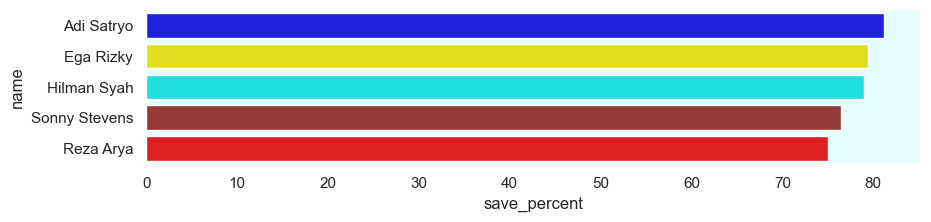

In [65]:
cols = []
def color(value):
    if value == 'psis':
        cols.append('blue')
    if value == 'barito':
        cols.append('yellow')
    if value == 'rans nusantara':
        cols.append('cyan')
    if value == 'bhayangkara / dewa united':
        cols.append('brown')
    if value == 'psm':
        cols.append('red')

for x in best_5.club:
    color(x)
plt.figure(figsize=(10,2))
sns.set(rc={'axes.facecolor':'#E6FDFF'},style='dark')

sns.barplot(data=best_5, y='name',x='save_percent', palette=cols)
plt.savefig('best_5_gk_mw_9.png',bbox_inches='tight')